In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/ranja/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


<Axes: xlabel='SepalLengthCm', ylabel='Species'>

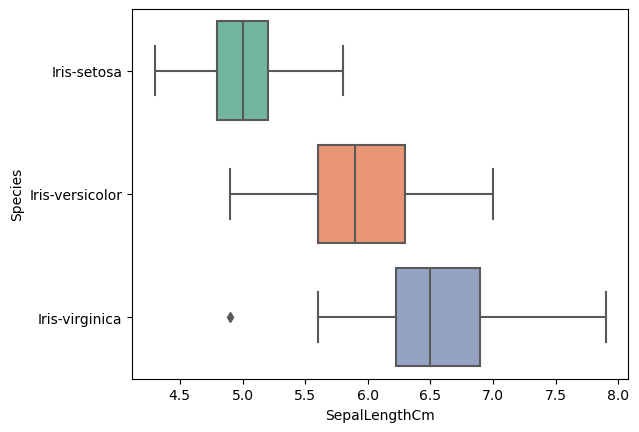

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(x = "SepalLengthCm" , y = "Species" , data = df , palette = "Set2" )

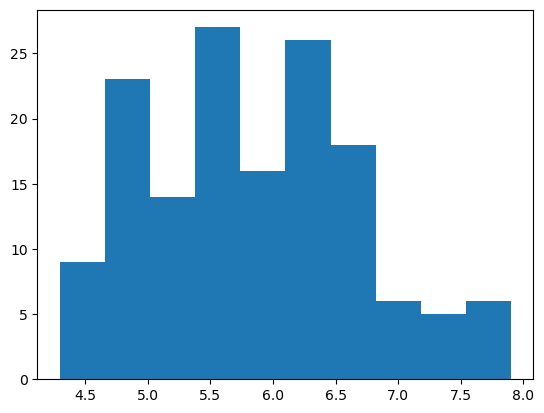

In [7]:
plt.hist(df["SepalLengthCm"])
plt.show()

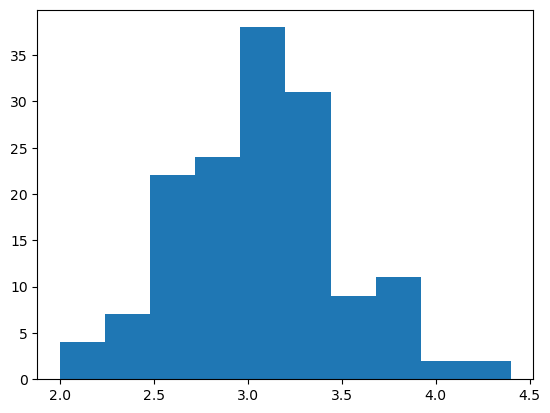

In [8]:
plt.hist(df["SepalWidthCm"])
plt.show()

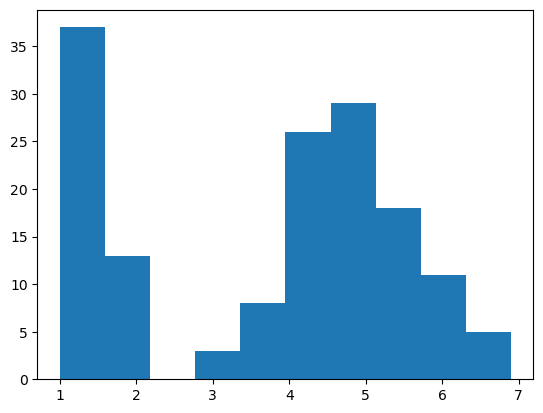

In [9]:
plt.hist(df["PetalLengthCm"])
plt.show()

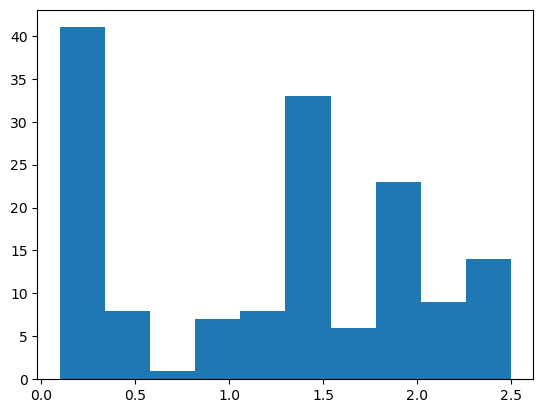

In [10]:
plt.hist(df["PetalWidthCm"])
plt.show()

<BarContainer object of 3 artists>

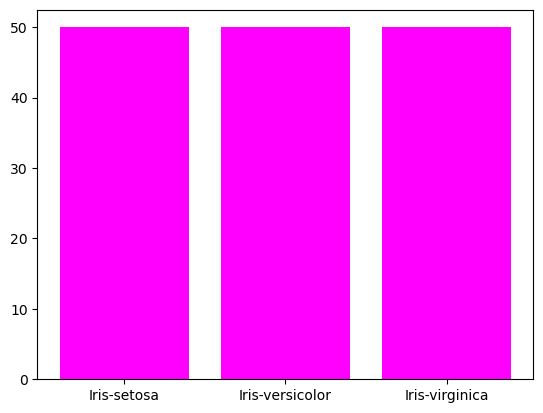

In [11]:
plt.bar(df["Species"].value_counts().index , df["Species"].value_counts().values ,color = 'magenta')

In [12]:
# label_encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [13]:
df["Species"].unique() 

array([0, 1, 2])

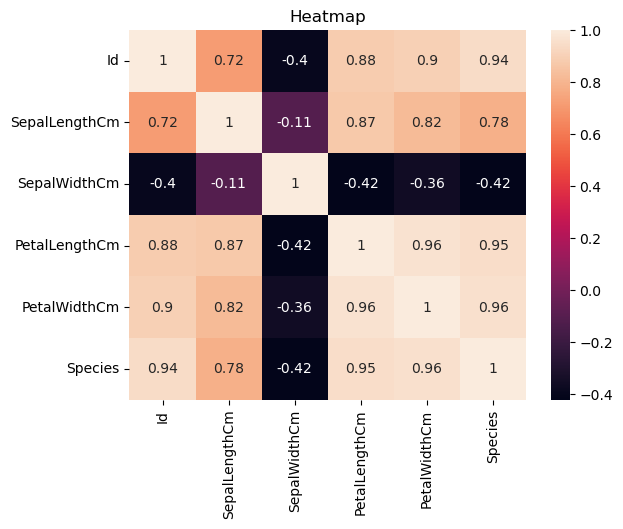

In [14]:
sns.heatmap(df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr(),annot=True)
plt.title("Heatmap")
plt.show()

In [15]:
x = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,-1].values

#Splitting into training and testing set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


0.9666666666666667

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0